In [185]:
#define inputs here


control = [[],[]] #array of people in control for each one we will examine
treatment = [[],[]] #array of people in treatement for each one we will examine
#NOTE - redefined to be 1D arrays - rn I think just running on one sample

import pandas as pd
#load dataset
with open("../Groups.csv", 'r') as f:
    df = pd.read_csv(f)
# df.head()
control = df["control_group"].to_list()
treatment = df["treatment_group"].to_list()

#i know there's some duplicates but let's make sure there's some overlap
for c in control:
    assert(not c in treatment)

In [186]:
# !pip install pandas

In [187]:
# !pip install empath

In [188]:
#define input text model (as will be analyzed) here
from empath import Empath

global lexicon

lexicon = Empath()

#negative
lexicon.create_category("angry", ["angry"], model="nytimes")
lexicon.create_category("lonely", ["lonely"], model="nytimes")
lexicon.create_category("sad", ["sad"], model="nytimes")
lexicon.create_category("worried", ["worried"], model="nytimes")
lexicon.create_category("frustrated", ["frustrated"], model="nytimes")
lexicon.create_category("anxious", ["anxious"], model="nytimes")
lexicon.create_category("nervous", ["nervous"], model="nytimes")
lexicon.create_category("disappointed", ["disappointed"], model="nytimes")
lexicon.create_category("gloomy", ["gloomy"], model="nytimes")
lexicon.create_category("miserable", ["miserable"], model="nytimes")
lexicon.create_category("lonely", ["lonely"], model="nytimes")

#positive
lexicon.create_category("happy", ["happy"], model="nytimes")
lexicon.create_category("loved", ["loved"], model="nytimes")
lexicon.create_category("joyful", ["joyful"], model="nytimes")
lexicon.create_category("content", ["content"], model="nytimes")
lexicon.create_category("pleased", ["pleased"], model="nytimes")
lexicon.create_category("grateful", ["grateful"], model="nytimes")
lexicon.create_category("relieved", ["relieved"], model="nytimes")
lexicon.create_category("optimistic", ["optimistic"], model="nytimes")
lexicon.create_category("satisfied", ["satisfied"], model="nytimes")
lexicon.create_category("excited", ["excited"], model="nytimes")
lexicon.create_category("loved", ["loved"], model="nytimes")





["angry", "furious", "frustrated", "frightened", "disgusted", "outraged", "upset", "irritated", "resentful", "annoyed", "embarrassed", "unhappy", "exasperated", "incensed", "indignant", "fearful", "distressed", "scared", "terrified", "enraged", "confused", "afraid", "anxious", "irate", "insulted", "agitated", "distraught", "nervous", "bitter", "bewildered", "impatient", "offended", "shocked", "disgusted", "humiliated", "ashamed", "apprehensive", "puzzled", "incredulous", "perplexed", "tired", "worried", "disgruntled", "mystified", "dispirited", "despondent", "sad", "aghast", "alarmed", "exasperated", "mad", "terrified", "dismayed", "aggrieved", "irritated", "uneasy", "apologetic", "pained", "angered", "uncomfortable", "annoyed", "frightened", "bewildered", "horrified", "dissatisfied", "sorry", "appalled", "disappointed", "insecure", "defiant", "jealous", "relieved", "shocked", "bullied", "abusive", "intimidated", "disturbed", "suspicious", "complaining", "embittered", "elated", "angrie

In [189]:
def get_data_from_txt(txt:str):
    global lexicon

    unnormalized = lexicon.analyze(txt, categories=["angry","sad","worried",
       "frustrated","anxious",
        "nervous","disappointed",
      "gloomy","miserable","longly",
       "happy", "loved", "joyful",
        "content", "pleased",
      "grateful", "relieved",
      "optimistic", "satisfied",
        "excited"],normalize = False)
  
    normalized = lexicon.analyze(txt, categories=["angry","sad","worried",
       "frustrated","anxious",
        "nervous","disappointed",
      "gloomy","miserable","longly",
       "happy", "loved", "joyful",
        "content", "pleased",
      "grateful", "relieved",
      "optimistic", "satisfied",
        "excited"],normalize = True)
    

    #we want to make these average to 0 
    summed = 0
    for v in normalized.values(): summed += v 
    to_add = -summed/len(normalized)

    for k in normalized.keys():
        normalized[k] += to_add
    
    return normalized
    
    # assert False, "use the lexicon Jiayi uses for results - note this is current but idk there is way to get past one"

In [190]:
get_data_from_txt("I want to die")

{'angry': -0.0125,
 'sad': -0.0125,
 'worried': -0.0125,
 'frustrated': -0.0125,
 'anxious': -0.0125,
 'nervous': -0.0125,
 'disappointed': -0.0125,
 'gloomy': -0.0125,
 'miserable': -0.0125,
 'longly': -0.0125,
 'happy': 0.2375,
 'loved': -0.0125,
 'joyful': -0.0125,
 'content': -0.0125,
 'pleased': -0.0125,
 'grateful': -0.0125,
 'relieved': -0.0125,
 'optimistic': -0.0125,
 'satisfied': -0.0125,
 'excited': -0.0125}

In [191]:
from typing import List, Dict, Tuple

In [192]:
# !pip install praw

In [193]:
import praw  #Python Reddit API Wrappe

In [194]:
reddit = praw.Reddit(
    client_id="54u8-WeUDusPlUoFQDZu4w",
    client_secret="lGhkiE6scCkSMYsj0P9AXzyYVSLBag",
    user_agent="jellyfish"
)

In [195]:
# user = reddit.redditor('Sariel007')
#https://praw.readthedocs.io/en/stable/code_overview/reddit/user.html#praw.models.User

this_redditor = reddit.redditor('Sariel007')
for comment in this_redditor.comments.top():
    # print("\n".join(dir(comment)))
    print(comment.subreddit_id)
    break

t5_2qnts


In [196]:
from datetime import datetime

In [197]:
#class to map a string based Enum to an integer, enable backtrace
class Enum:

    #class variable to map enum names to potential enu
    find_name = dict()
    def __init__(self, name):
        assert(not name in Enum.find_name)
        Enum.find_name[name] = self
        self.names = dict()
        self.int_to_name = dict() #array would be more efficieny
    
    #map the name to a number
    def get_val(self, enum):
        if (not enum in self.names):
            self.int_to_name[len(self.names)+1] = enum
            self.names[enum] = len(self.names) + 1
        return self.names[enum]
    
    #get the number of enums in this class
    def get_num_enums(self):
        return len(self.names)

    def get_enum(name):
        return Enum.find_name[name] if name in Enum.find_name else Enum(name)
    
    def is_enum(name):
        return name in Enum.find_name
    

In [198]:

def process_comments(redditor:praw.models.Redditor) -> List[Tuple[datetime.date, Dict]]:
    comment_arr = list()
    for comment in redditor.comments.top():
        date = datetime.fromtimestamp(comment.created_utc)
        val_here = {
            "is_edited": comment.edited,
            # "link_title": comment.link_title, 
            "num_replies": len(comment.replies.list()),
            "score": comment.score, 
            "score_is_hidden": comment.score_hidden,
            "total_awards": comment.total_awards_received, 
            "num_ups": comment.ups, 
            "num_downs": comment.downs, 
            # "body": comment.body,
            # "date": comment.created_utc,
            "is_submitter": comment.is_submitter, 
            "stickied": comment.stickied
        }
        for name, txt_data in [("title", comment.link_title), ("body", comment.body)]:
            emotion_dict = get_data_from_txt(txt_data)
            for emotion_name, emotion_val in emotion_dict.items():
                val_here[name + "_" + emotion_name] = emotion_val
        # assert False, "need to analyze body + title using emotions"
        comment_arr.append((date, val_here))
    comment_arr.sort()
    return comment_arr
        
def get_base_data_redditor(redditor: praw.models.Redditor):
    to_ret = dict()
    to_ret["comment_karma"] = redditor.comment_karma
    to_ret["time_creation"] = redditor.created_utc
    to_ret["verified_email"] = redditor.has_verified_email
    to_ret["is_employee"] = redditor.is_employee
    to_ret["is_mod"] = redditor.is_mod
    to_ret["is_gold"] = redditor.is_gold 
    to_ret["link_karma"] = redditor.link_karma
    to_ret["num_moderated"] = len(redditor.moderated()) # TODO - analyze
    to_ret["num_multireddits"] = len(redditor.multireddits()) #TODO - analyze
    to_ret["num_trophies"] = len(redditor.trophies()) # TODO - analyze the kind a trophies
    
    
    if (redditor.subreddit):
        to_ret["has_subreddit"] = True
        to_ret["over_18"] = redditor.subreddit.over_18#redditor.subreddit["over_18"]
        to_ret["num_subscribers"] = redditor.subreddit.subscribers#redditor.subreddit["subscribers"]
        #analyze public description
        #analyze title
    else:
        to_ret["has_subreddit"] = False

    

    return to_ret
def get_base_data(user_name: str):
    print("base data for ", user_name)
    try:
        this_redditor = reddit.redditor(user_name)
        print("returning")
        to_ret = {"user_comment_data": process_comments(this_redditor), "valid": True}
        to_ret.update({"base_data": get_base_data_redditor(this_redditor)})
        return to_ret
    except Exception as E:
        print("Exception is ", E)
        return {"valid": False}



In [199]:
# treatment

new_control_str = """ 
radpandaparty
Somedude_89
H0ll0wHag
england-is-my-sydney
mxpx424
kayleerochelle7
mmmmmmmmmmmmmmfarts
MaxArgentum
SnooFloofs8295
King-Enjoyer
TheEnviious
catkell12
meandhimandthose2
meandhimandthose2
Ok_Resist1424
ParkingPsychology
farklespanktastic
Pro_Scrub
triciaward
negraboriqua
mmmmmmmmmmmmmmfarts
ParkingPsychology
maniacalmango0
komalsarah
sparky_line66
Rhazelgy
Hello3424
whale_omelette94
numberonealcove
Its_Binou
gggg500
Revolutionary_Sir767
"""

old_control_str = """Cosplay_bird168
Somedude_89
H0ll0wHag
england-is-my-sydney
mxpx424
kayleerochelle7
mmmmmmmmmmmmmmfarts
MaxArgentum
SnooFloofs8295
gmiller89
TheEnviious
catkell12
meandhimandthose2
meandhimandthose2
Ok_Resist1424
ParkingPsychology
farklespanktastic
hadleyjane
triciaward
negraboriqua
mmmmmmmmmmmmmmfarts
ParkingPsychology
maniacalmango0
kappek
sparky_line66
catkell12
Hello3424
whale_omelette94
numberonealcove
Its_Binou
jimmiller1234
Revolutionary_Sir767"""

control = [i.strip() for i in new_control_str.split("\n") if i.strip()]

In [200]:
from concurrent.futures import ThreadPoolExecutor

def get_base_data_parallel(c):
    return c, get_base_data(c)

with ThreadPoolExecutor() as executor:
    control_dataset = dict(executor.map(get_base_data_parallel, [c for c in control if isinstance(c, type(""))]))

with ThreadPoolExecutor() as executor:
    treatment_dataset = dict(executor.map(get_base_data_parallel, [t for t in treatment if isinstance(t, type(""))]))
    
# control_dataset = {c: get_base_data(c) for c in control if isinstance(c, type(""))}
# treatment_dataset = {t: get_base_data(t) for t in treatment if isinstance(t, type(""))}

base data for base data for  Somedude_89
returning
 radpandaparty
returning
base data for  H0ll0wHag
returning
base data for  england-is-my-sydney
returning
base data for  mxpx424
returning
base data for  kayleerochelle7
returning
base data for  mmmmmmmmmmmmmmfarts
returning
base data for  MaxArgentum
returning
base data for  SnooFloofs8295
returning
base data for  King-Enjoyer
returning
base data for  TheEnviious
returning
base data for  catkell12
returning
base data for  meandhimandthose2
returning
base data for  meandhimandthose2
returning
base data for  Ok_Resist1424
returning
base data for  ParkingPsychology
returning
base data for  farklespanktastic
returning
base data for  Pro_Scrub
returning
base data for  triciaward
returning
base data for  negraboriqua
returning
base data for  mmmmmmmmmmmmmmfarts
returning
base data for  ParkingPsychology
returning
base data for  maniacalmango0
returning
base data for  komalsarah
returning
base data for  sparky_line66
returning
base data for 

In [201]:
print(treatment_dataset["MoosieGoose"]["user_comment_data"][0][0])
random_user = get_base_data("sage_x3")
print(random_user["user_comment_data"][0][0])

2019-07-16 10:48:48
base data for  sage_x3
returning
2012-07-29 10:49:29


Notes to self
should have two datasets - an extended dataset (i.e. once we get a lot of data we can use)
a base stats - those stats I would think are essential for use on a more limitted dataset

In [202]:
#get dataset for both these guys
# control_dataset = {c: get_base_data(c) for c in control}
# treatment_dataset = {t: get_base_data(t) for t in treatment}

In [203]:
#statistics
import scipy
SIGNIFICANCE = .05
def get_stats_continuous(dist1: List[int|float], dist2: List[int|float]) -> Tuple[bool, float, float]:
    """returns whether or not they are from the same distribution (p value), p value, and """

    max_both = max(dist1+ dist2)
    min_both = min(dist1+dist2) 
    epsilon = 1/100000000
    dist1 = [(v-min_both)/(max_both-min_both+epsilon) for v in dist1]
    dist2 = [(v-min_both)/(max_both-min_both+epsilon) for v in dist2]

    #continuous how likely would I see dist1 | dist2 (+ vice versa, takes min)
    stats_results = scipy.stats.kstest(dist1, dist2)
    print("p is ",stats_results.pvalue )
    return stats_results.pvalue > SIGNIFICANCE, stats_results.pvalue

def get_stats_categorical(dist1: List[int|bool], dist2: List[int|bool]) -> Tuple[bool, float]: 
    #create dict for chi squared
    val_to_idx = dict()
    keys1 = dict()
    keys2 = dict()

    for v in dist1:
        keys1[v] = keys1.get(v,0) + 1
        # all_keys[v] = all_keys.get(v,0)+1
        if (not v in val_to_idx):
            val_to_idx[v] = len(val_to_idx)
    
    for v in dist2:
        keys2[v] = keys2.get(v,0)  + 1
        # all_keys[v] = all_keys.get(v,0)+1
        if (not v in val_to_idx):
            val_to_idx[v] = len(val_to_idx)

    #create arrays for frequencies
    freq1 = [0] * len(val_to_idx)
    freq2 = [0] * len(val_to_idx)

    #set both for distribution
    for val, num in keys1.items():
        freq1[val_to_idx[val]] = num 
    
    for val, num in keys2.items():
        freq2[val_to_idx[val]] = num 
    
    #construct a contingency table from this data
    contingency_table = [freq1, freq2]

    result = scipy.stats.chi2_contingency(contingency_table)
    print("p is ", result.pvalue)
    return result.pvalue > SIGNIFICANCE, result.pvalue
    #chi2_contingency
    #contingency table has rows of teh values (in this case 2 by NUM CATEGORIES)
    


In [204]:
#test it stupidly real quick
from random import randint
print(get_stats_continuous([randint(1,4)/1000 for i in range(100)], [randint(-1,10)/1000 for i in range(80)]))
print(get_stats_categorical([randint(1,2) == 1 for i in range(100)], [randint(-1,3)==2 for i in range(85)]))
print(get_stats_categorical([randint(1,5) for i in range(100)], [randint(1,5) for i in range(80)]))

p is  4.4118853900475947e-16
(False, 4.4118853900475947e-16)
p is  6.445656359004403e-06
(False, 6.445656359004403e-06)
p is  0.4696519979448355
(True, 0.4696519979448355)


In [205]:
#same -> lower
#The closer this number is to 0 the more likely it is that the two samples were drawn from the same distribution
# You reject the null hypothesis that the two samples were drawn from the same distribution if the p-value is less than your significance level
####fail to reject if greater than significance level (p=0.5)
scipy.stats.kstest([1,2,3,4,1,2,3], [1,2,3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,11,1])

KstestResult(statistic=0.5642857142857143, pvalue=0.04337916511829555, statistic_location=1, statistic_sign=-1)

In [206]:
#only get ppl we could get data for 
print(len(control_dataset))
print(len(treatment_dataset))
control_dataset = {k: v for k, v in control_dataset.items() if v["valid"]}
treatment_dataset = {k: v for k, v in treatment_dataset.items() if v["valid"]}

print(len(control_dataset))
print(len(treatment_dataset))

29
31
29
30


In [207]:
# control_dataset["esearcher"]["base_data"].keys()
base_control_data = pd.DataFrame.from_dict({_id: data["base_data"] for _id, data in control_dataset.items()}).transpose()
base_treat_data = pd.DataFrame.from_dict({_id: data["base_data"] for _id, data in treatment_dataset.items()}).transpose()

In [208]:
!pip install matplotlib

In [209]:
import matplotlib.pyplot as plt 
import numpy as np 
def visualize_continuous_data(dist1, dist2, name):
    d1 = dist1 
    d2 = dist2
    #boxplot
    plt.figure()

    fig, axs = plt.subplots(1,2, figsize=(20,5))
    _min = min(min(dist1), min(dist2))
    _max = max(max(dist1), max(dist2))

    epsilon = 1/1000000
    dist1 = [(v - _min)/(_max - _min + epsilon) for v in dist1]
    dist2 = [(v - _min)/(_max - _min + epsilon) for v in dist2]

    # plt.title("Box and Whiskers")
    axs[0].set_title("Box and Whiskers")
    axs[0].boxplot([dist1, dist1+dist2, dist2])
    axs[0].set_xlabel("Distributions")
    axs[0].set_ylabel("Normalized " + name)
    axs[0].set_xticks([1,2,3], ["Control", "Both", "Treatment"])

    
    
    axs[1].ecdf(d1)
    axs[1].ecdf(d1+d2)
    axs[1].ecdf(d2)

    plt.title("Cumulative Distribution Function (Empirical)")
    plt.legend(["Control", "Both", "Treatment"])
    plt.suptitle(name)

    plt.show()
    print("\n"*4)
    

def visualize_categorical_data(dist1, dist2, name):

    
    if (Enum.is_enum(name)):
        #UNTESTED
        converter = Enum.get_enum(name).int_to_name
        idx_to_name = [converter[i] for i in range(len(converter))]
        frequency_cnt = [[0]*len(converter), [0] * len(converter), [0] * len(converter)]
    else:
        # converter = {True: "Positive", False: "Negative"}
        idx_to_name = ["False", "True"]
        frequency_cnt = [[0,0], [0,0], [0,0]]
    
    #fill out frequency cnt
    for (dist, idx) in [(dist1, 0), (dist2, 1)]:
        for data_instance in dist: 
            frequency_cnt[idx][data_instance] += 1
            frequency_cnt[-1][data_instance] += 1
        for sub_idx in range(len(frequency_cnt[idx])):
            #convert to proportion
            frequency_cnt[idx][sub_idx] /= len(dist)
    for sub_idx in range(len(frequency_cnt[idx])):
        frequency_cnt[-1][sub_idx] /= (len(dist1) + len(dist2))


    #visualization code from https://www.geeksforgeeks.org/create-a-grouped-bar-plot-in-matplotlib/#

    yerr = [np.sqrt(frequency_cnt[-1][i] * (1-frequency_cnt[-1][i]) / min(len(dist1), len(dist2))) for i in range(len(frequency_cnt[-1]))]
    print("yerr is ", yerr)
    plt.figure()
    all_xs = np.arange(len(frequency_cnt[0]))
    plt.bar(all_xs-0.2, frequency_cnt[0], 0.2, color='red', alpha=0.68) 
    plt.bar(all_xs+.2, frequency_cnt[1], 0.2, color='blue', alpha=0.68) 
    plt.bar(all_xs, frequency_cnt[-1], 0.2, color='purple', alpha=0.68)
    plt.errorbar(all_xs,frequency_cnt[-1], yerr, capsize=25, fmt='none', ecolor="black")
    plt.xticks(all_xs, idx_to_name) 
    plt.xlabel(name) 
    plt.ylabel("Proportion") 
    plt.legend(["Control","Treatment", "Both"]) 
    plt.suptitle(name)
    plt.show() 
    print("\n"*4)


p is  6.28151295316233e-07


<Figure size 640x480 with 0 Axes>

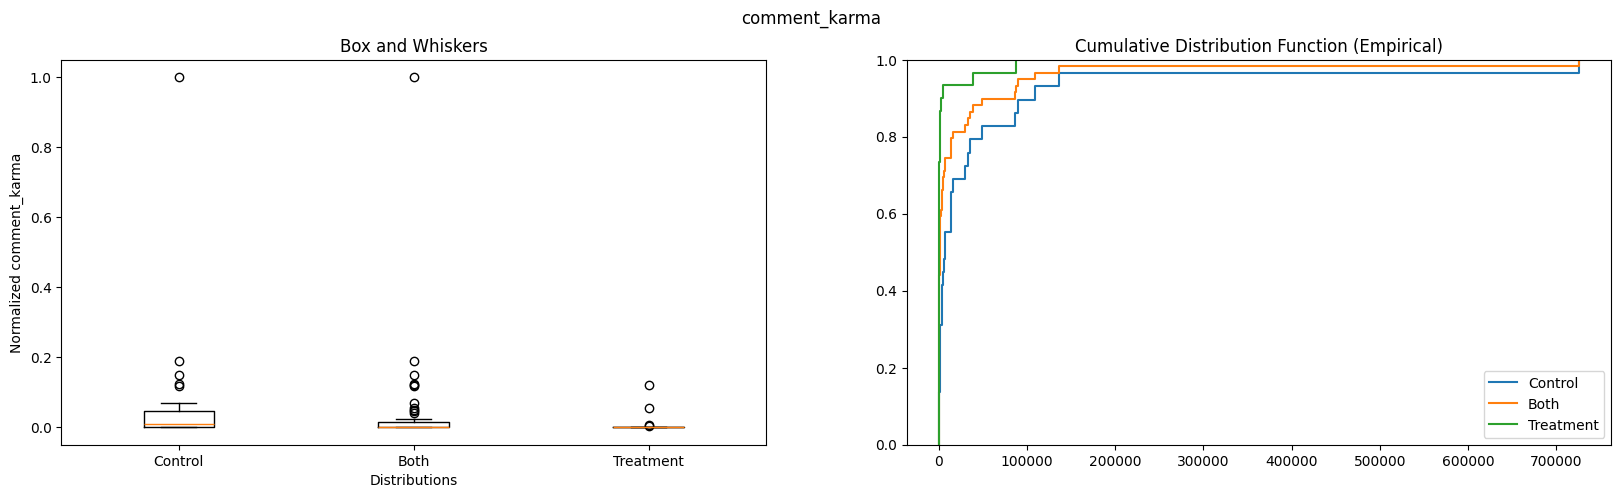






p is  0.0007953515506572045


<Figure size 640x480 with 0 Axes>

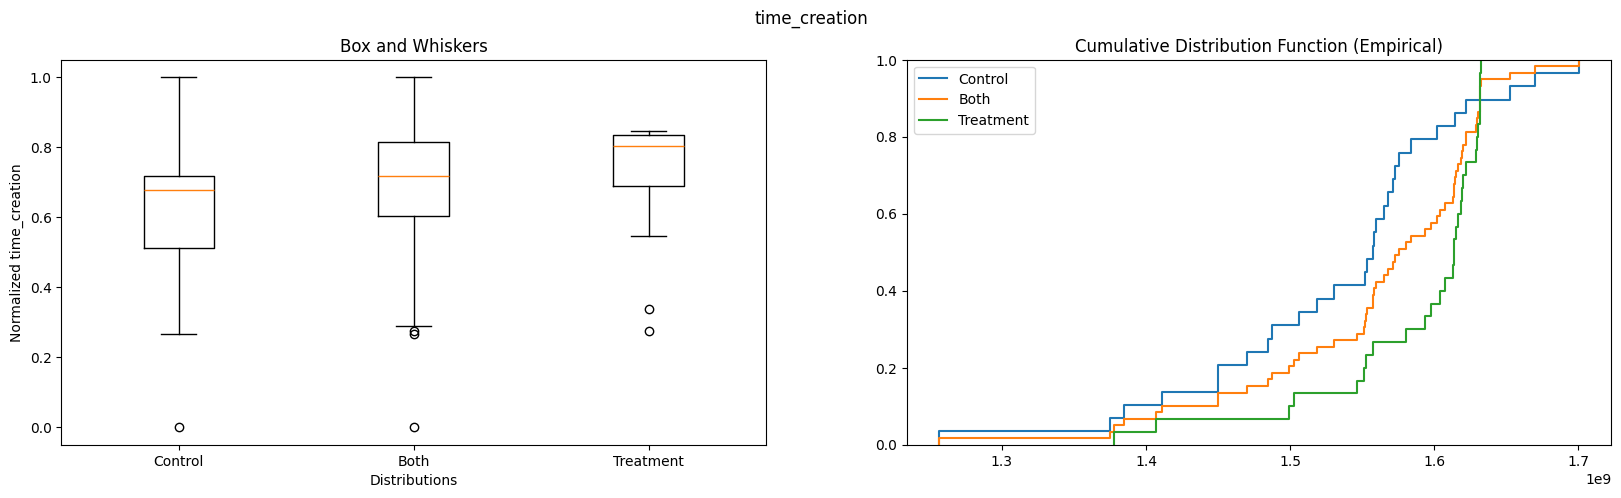






p is  0.21181603765103094
yerr is  [0.0561258006518948, 0.05612580065189478]


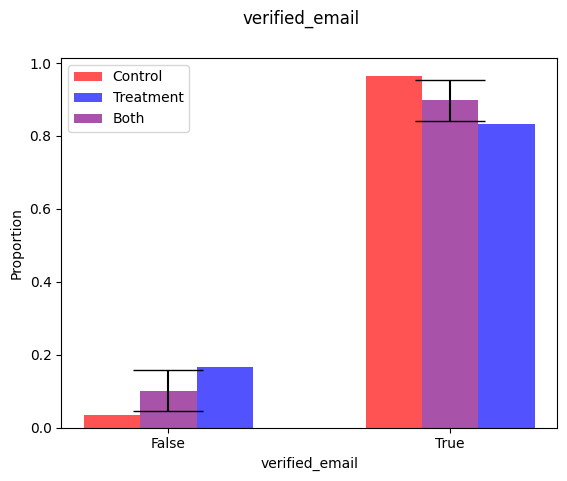






p is  1.0
yerr is  [0.0, 0.0]


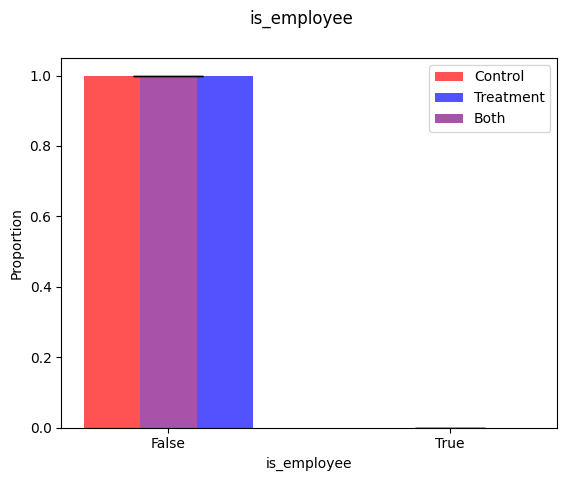






p is  0.3936084664204389
yerr is  [0.060048156816090346, 0.06004815681609034]


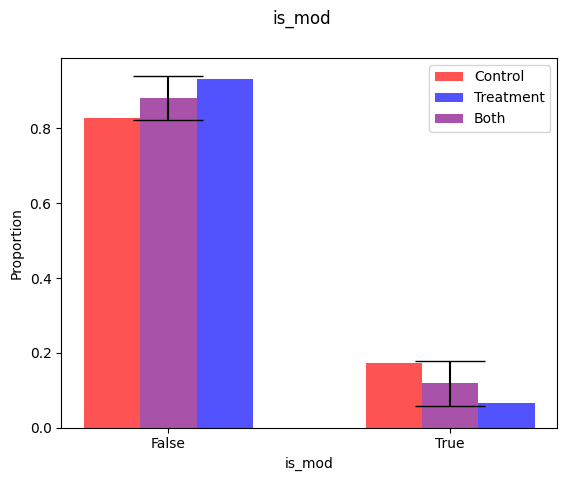






p is  1.0
yerr is  [0.0, 0.0]


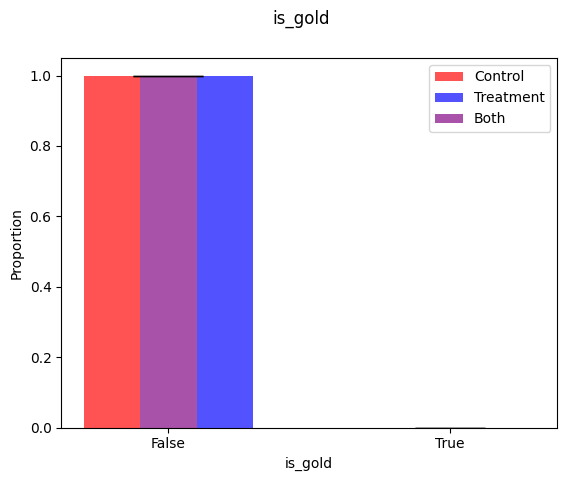






p is  0.001735852444635473


<Figure size 640x480 with 0 Axes>

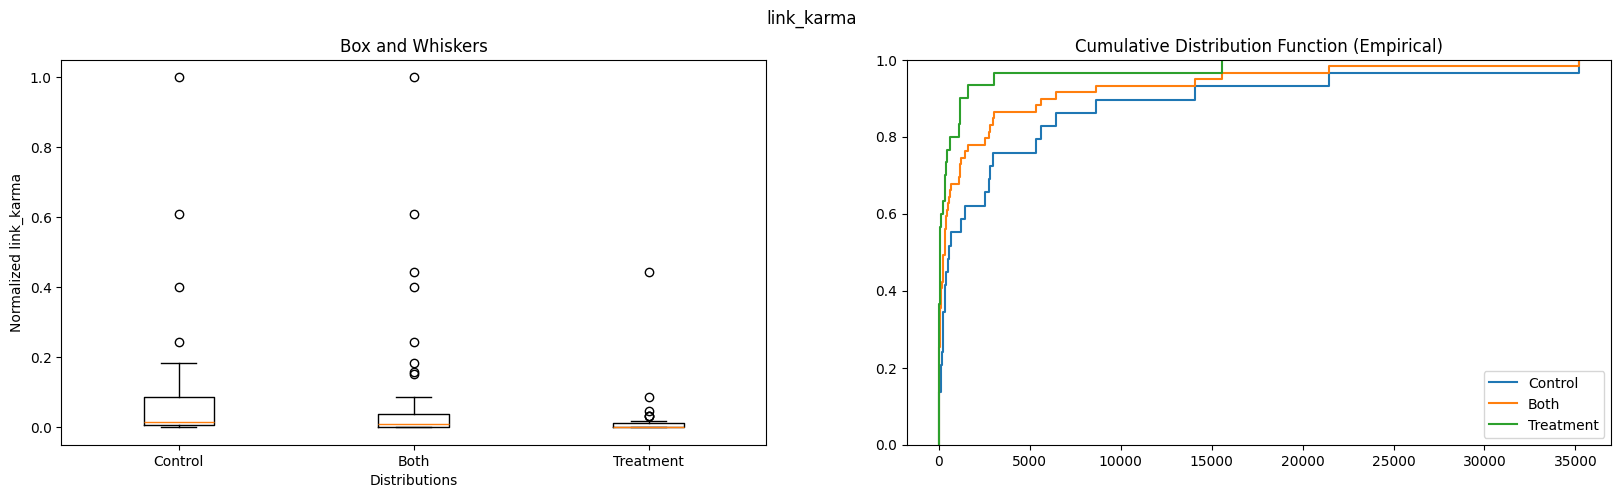






p is  0.9877639314094958


<Figure size 640x480 with 0 Axes>

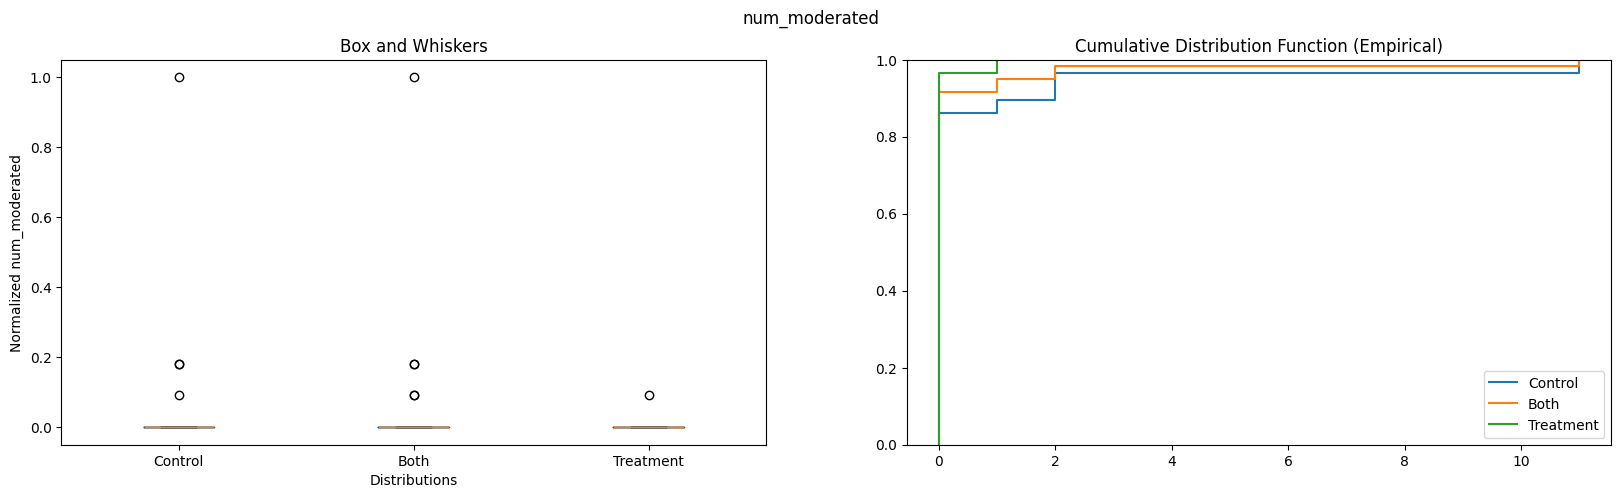






p is  1.0


<Figure size 640x480 with 0 Axes>

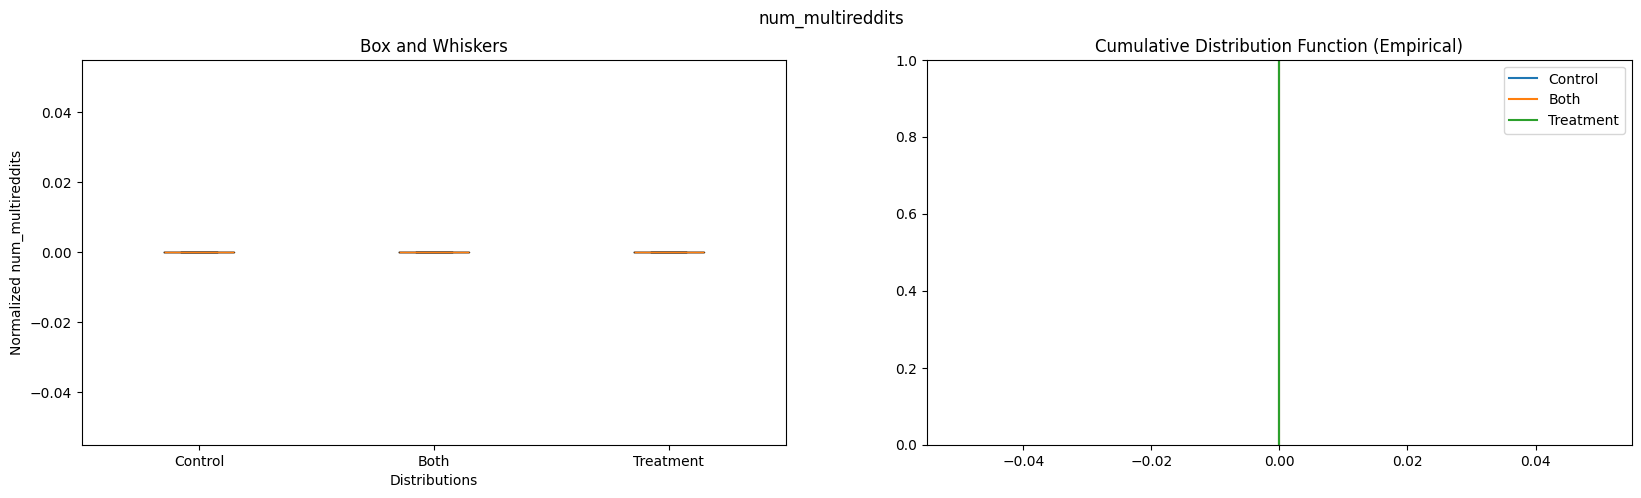






p is  0.004569526441391755


<Figure size 640x480 with 0 Axes>

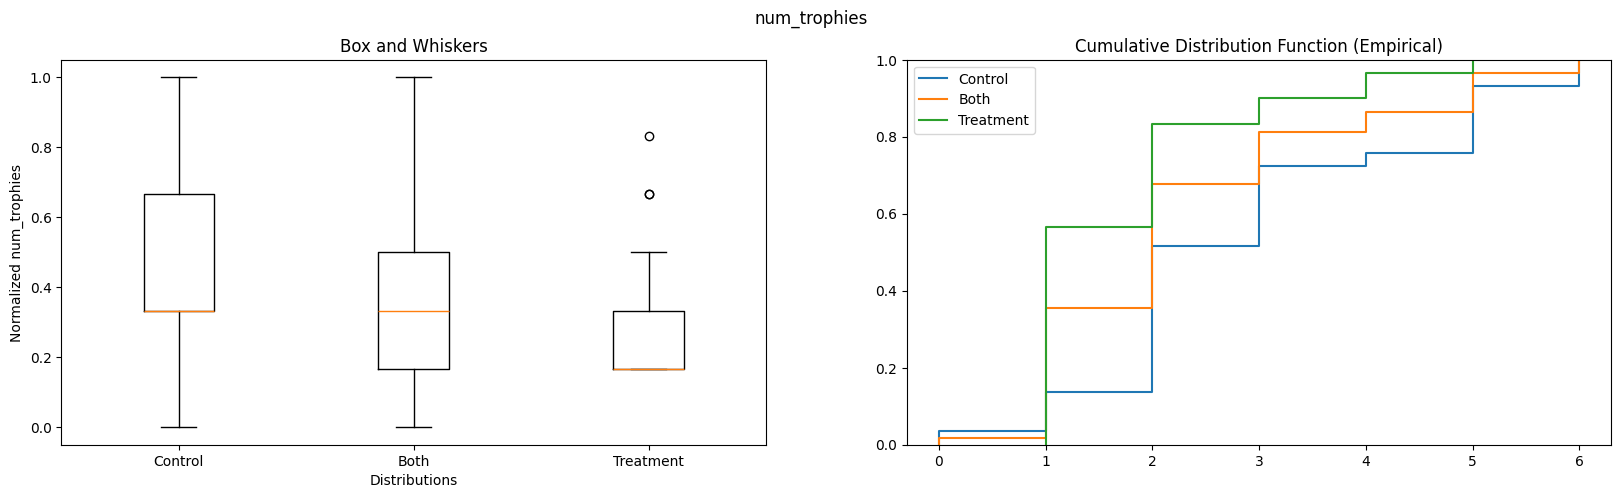






p is  1.0
yerr is  [0.0, 0.0]


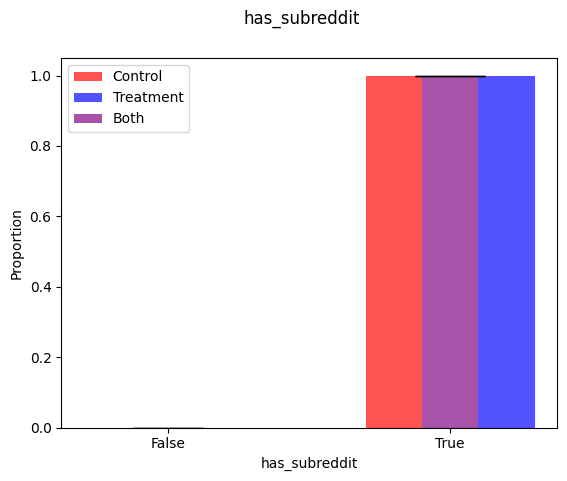






p is  0.2176343179229343
yerr is  [0.08410040656343204, 0.08410040656343204]


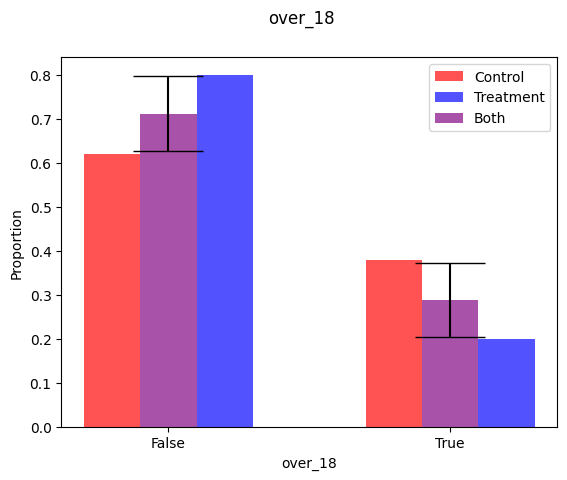






p is  1.0


<Figure size 640x480 with 0 Axes>

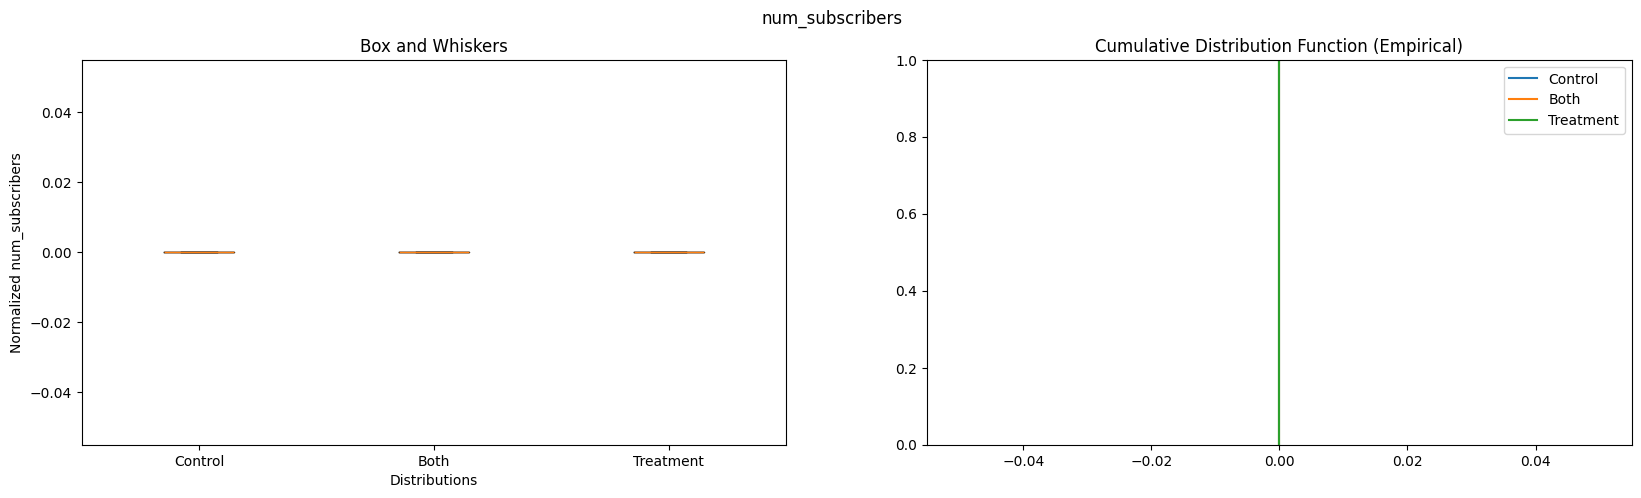

In [210]:
#iterate thru all the columns

class GraphDisplayer:
    def __init__(self, l1, l2, n, visualizer, to_print): 
        self.l1 = l1 
        self.l2 = l2
        self.n = n
        self.visualizer = visualizer 
        self.to_print = to_print

    def show(self):
        print(self.to_print)
        self.visualizer(self.l1, self.l2, self.n) 
        print("\n"*4)
    
all_sig_diff = list()
all_not_sig_diff = list()
display_plot_by_name = dict()
for col in base_control_data.to_dict().keys():

    control_vals = base_control_data[col].to_list()
    treat_vals = base_treat_data[col].to_list()

    #which function analyzes distributions to see if they are the same 
    analyzer = get_stats_continuous
    visualizer = visualize_continuous_data

    #its categorical data 
    if (Enum.is_enum(col) or isinstance(control_vals[0], type(False))):
        analyzer = get_stats_categorical
        visualizer = visualize_categorical_data
        
    not_bad, p_value = analyzer(control_vals, treat_vals)

    visualizer(control_vals, treat_vals, col)

    

    
    
    if (not_bad): all_not_sig_diff.append((p_value, col))
    else: all_sig_diff.append((p_value, col))

    display_plot_by_name[col] = GraphDisplayer(control_vals, treat_vals, col, visualizer=visualizer, to_print = "pvalue is " + str(p_value))

all_sig_diff.sort()
all_not_sig_diff.sort()

In [211]:
base_control_data.to_dict().keys()

dict_keys(['comment_karma', 'time_creation', 'verified_email', 'is_employee', 'is_mod', 'is_gold', 'link_karma', 'num_moderated', 'num_multireddits', 'num_trophies', 'has_subreddit', 'over_18', 'num_subscribers'])

In [212]:
len(all_sig_diff)

4

In [213]:
all_sig_diff

[(6.28151295316233e-07, 'comment_karma'),
 (0.0007953515506572045, 'time_creation'),
 (0.001735852444635473, 'link_karma'),
 (0.004569526441391755, 'num_trophies')]

In [214]:
all_not_sig_diff

[(0.21181603765103094, 'verified_email'),
 (0.2176343179229343, 'over_18'),
 (0.3936084664204389, 'is_mod'),
 (0.9877639314094958, 'num_moderated'),
 (1.0, 'has_subreddit'),
 (1.0, 'is_employee'),
 (1.0, 'is_gold'),
 (1.0, 'num_multireddits'),
 (1.0, 'num_subscribers')]

pvalue is 0.001735852444635473


<Figure size 640x480 with 0 Axes>

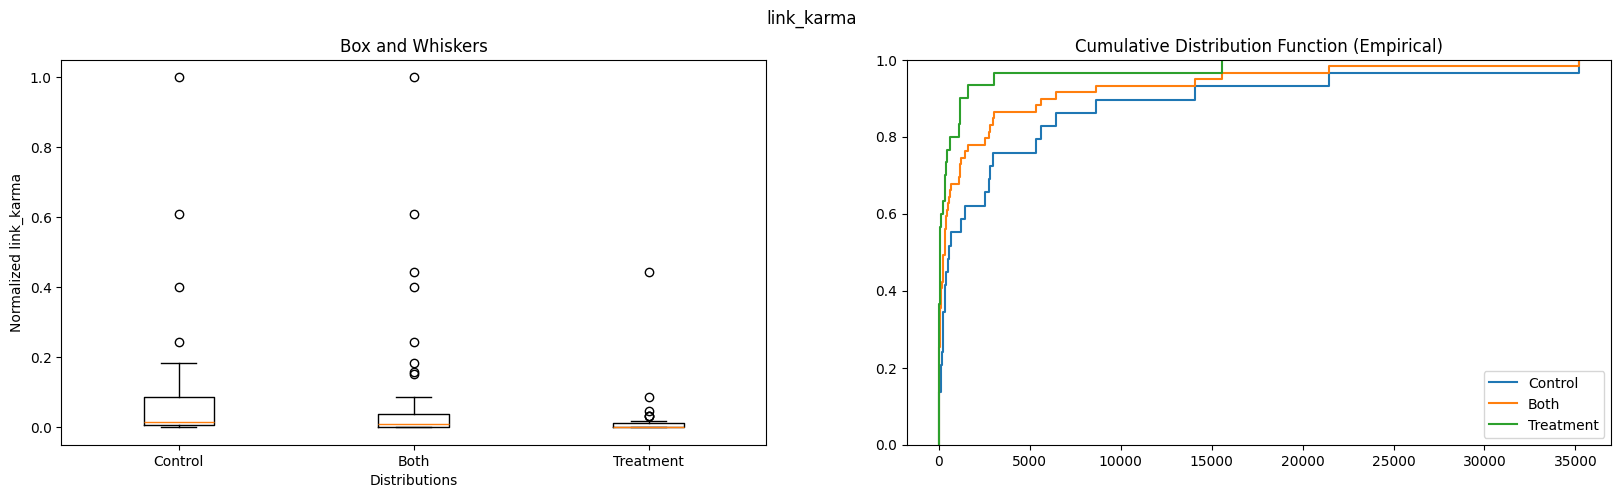

In [233]:
display_plot_by_name["link_karma"].show()

# Analyze Time Series Data

In [216]:
control_dataset[list(control_dataset.keys())[0]].keys()

dict_keys(['user_comment_data', 'valid', 'base_data'])

In [217]:
treatment_dataset.keys()

dict_keys(['MoosieGoose', 'JollyK9', 'Southern_Ad3032', 'bduwowy272habbw', 'Late_Introduction203', 'kapster68', 'TheApertureMonkey', 'talemoon22', 'sebagolindenwald', 'spicyranchplzz', 'TheFloorMayBeLava_02', 'rxtten_flesh', 'greenblooded395', 'DrakenJosh98', 'WhichUsernameIsBest', 'FStahp2', 'Pongpianskul', 'Kanashimi515', 'eviuwu', 'Kattheloner_22', 'Reeze2911', 'Sac20000', 'RanpoWasTaken', 'jlynny1811', 'Playful-Fail4778', 'katandcats', 'holyredemption', 'jifpeanutbutter420', 'Timely_Inflation1000', 'Erica_Peanut'])

In [218]:
# for i in range(len(treatment_dataset["MoosieGoose"]["user_comment_data"])):
#     print(treatment_dataset["MoosieGoose"]["user_comment_data"][i][0])
#     print(treatment_dataset["JollyK9"]["user_comment_data"][i][0])
#     print("\n"*3)

In [219]:
comment_control_data = {_id: data["user_comment_data"] for _id, data in control_dataset.items()}
comment_treat_data = {_id: data["user_comment_data"] for _id, data in treatment_dataset.items()}

In [220]:
comment_treat_data["RanpoWasTaken"][1]

(datetime.datetime(2021, 9, 27, 8, 27, 19),
 {'is_edited': False,
  'num_replies': 0,
  'score': 1,
  'score_is_hidden': False,
  'total_awards': 0,
  'num_ups': 1,
  'num_downs': 0,
  'is_submitter': False,
  'stickied': False,
  'title_angry': 0.0,
  'title_sad': 0.0,
  'title_worried': 0.0,
  'title_frustrated': 0.0,
  'title_anxious': 0.0,
  'title_nervous': 0.0,
  'title_disappointed': 0.0,
  'title_gloomy': 0.0,
  'title_miserable': 0.0,
  'title_longly': 0.0,
  'title_happy': 0.0,
  'title_loved': 0.0,
  'title_joyful': 0.0,
  'title_content': 0.0,
  'title_pleased': 0.0,
  'title_grateful': 0.0,
  'title_relieved': 0.0,
  'title_optimistic': 0.0,
  'title_satisfied': 0.0,
  'title_excited': 0.0,
  'body_angry': -0.0038461538461538464,
  'body_sad': 0.021794871794871794,
  'body_worried': -0.0038461538461538464,
  'body_frustrated': -0.0038461538461538464,
  'body_anxious': -0.0038461538461538464,
  'body_nervous': -0.0038461538461538464,
  'body_disappointed': -0.00384615384615

In [221]:
CONTROL_DATE = datetime(2023,11,22)
global BASE_DATA
BASE_DATA = {'is_edited': False,
  'num_replies': 0,
  'score': 1,
  'score_is_hidden': False,
  'total_awards': 0,
  'num_ups': 1,
  'num_downs': 0,
  'date': 1632749239.0,
  'is_submitter': False,
  'stickied': False,
  'title_angry': 0.0,
  'title_sad': 0.0,
  'title_worried': 0.0,
  'title_frustrated': 0.0,
  'title_anxious': 0.0,
  'title_nervous': 0.0,
  'title_disappointed': 0.0,
  'title_gloomy': 0.0,
  'title_miserable': 0.0,
  'title_longly': 0.0,
  'title_happy': 0.0,
  'title_loved': 0.0,
  'title_joyful': 0.0,
  'title_content': 0.0,
  'title_pleased': 0.0,
  'title_grateful': 0.0,
  'title_relieved': 0.0,
  'title_optimistic': 0.0,
  'title_satisfied': 0.0,
  'title_excited': 0.0,
  'body_angry': 0.0,
  'body_sad': 0.0,
  'body_worried': 0.0,
  'body_frustrated': 0.0,
  'body_anxious': 0.0,
  'body_nervous': 0.0,
  'body_disappointed': 0.0,
  'body_gloomy': 0.0,
  'body_miserable': 0.0,
  'body_longly': 0.0,
  'body_happy': 0.0,
  'body_loved': 0.0,
  'body_joyful': 0.0,
  'body_content': 0.0,
  'body_pleased': 0.0,
  'body_grateful': 0.0,
  'body_relieved': 0.0,
  'body_optimistic': 0.0,
  'body_satisfied': 0.0,
  'body_excited': 0.0}

def get_posts_before(arr: Tuple[datetime, any], date: datetime) -> Tuple[datetime, any]:
    """return all posts before a certain date in ascending order (2001->2022)"""
    assert(all(arr[i] <= arr[i+1] for i in range(len(arr) - 1)))
    for i in range(len(arr)):
        if (arr[i][0] > date):
            return arr[:i]
    if (not len(arr)): return []
    return arr 

def get_posts_after(arr: Tuple[datetime, any], date: datetime)-> Tuple[datetime, any]:
    assert(all(arr[i] <= arr[i+1] for i in range(len(arr) - 1)))
    if (not len(arr)): return []
    for i in range(len(arr)):
        if (arr[i][0] >= date):
            return arr[i:]
    print(arr[-1][0], "<", date)
    assert(arr[-1][0] < date)
    return []

In [222]:
import math 
import copy
from datetime import timedelta

def get_user_time_data(_key, user_arr: Tuple[datetime, any], date_of_intervention: datetime) -> Dict[str, float]:
    global BASE_DATA
    # print("key is ", _key)
    print("date is ", user_arr[-1][0])

    relevant_posts = get_posts_before(user_arr, date_of_intervention)
    print("num posts before is ", len(relevant_posts))

    return_dict = dict()

    #get by number of posts
    for num_before in [1,5,9,20]:
        #deep copy this guy
        my_data = pd.DataFrame.from_dict({_key: BASE_DATA}).astype(float)

        num_get = min(num_before, len(relevant_posts))
        #get most recent k posts
        these_posts = relevant_posts[-num_get:]

        #add all - this reuses work but we're not writing for efficiecny rn
        for _, post in these_posts:
            # print("post is ", post)
            this_df = pd.DataFrame.from_dict({_key : post}).astype(float)
            my_data = my_data.add(this_df)

        if (num_get): my_data = my_data/num_get #my_data = my_data.div(math.sqrt(num_get))

        # return_dict[f'{num_before}_posts_before_root_normalized'] = my_data 
        for k, v in my_data[_key].to_dict().items():

            return_dict[f'{num_before}_posts_before_{k}_root_normalized'] = v 

    
    
    #get by date of posts
    # for days in [1, 3, 7, 21,84,365]:
    for days in [7, 14, 28, 4*30]:
        my_data = pd.DataFrame.from_dict({_key: BASE_DATA}).astype(float)
        
        #get all before this time 
        
        these_posts = get_posts_after(relevant_posts, date_of_intervention-timedelta(days=days))
        for post in these_posts:
            print(len(these_posts))
            print(post[0])
            print(date_of_intervention)
            print(days)
            assert(post[0] >= date_of_intervention-timedelta(days=days) )

        print("length of these posts is ", len(these_posts), "for days of", days)
        num_get = len(these_posts) 

        for _, post in these_posts:
            this_df = pd.DataFrame.from_dict({_key: post}).astype(float)
            my_data = my_data.add(this_df)

        #sqrt is for uncorrelated data I believe -> we expect these to be correlated. NOTE something inbetween might be better
        if (num_get): my_data = my_data/num_get#my_data.div(math.sqrt(num_get))

        # print("my_data is ", my_data)
        for k, v in my_data[_key].to_dict().items():
            # print("key is ", k)
            return_dict[f'{days}_days_before_{k}_root_normalized'] = v 

        return_dict[f'{days}_days_before_num_comments'] = num_get

    return return_dict


In [223]:
processed_comment_control_data = {k: get_user_time_data(k,v,CONTROL_DATE ) for k,v in comment_control_data.items()}
processed_control_comment_df = pd.DataFrame.from_dict(processed_comment_control_data).transpose()

processed_comment_treatment_data = {k: get_user_time_data(k,v,CONTROL_DATE ) for k,v in comment_treat_data.items()}
processed_treatment_comment_df = pd.DataFrame.from_dict(processed_comment_treatment_data).transpose()

processed_control_comment_df.head()

date is  2023-10-21 13:34:33
num posts before is  100
2023-10-21 13:34:33 < 2023-11-15 00:00:00
length of these posts is  0 for days of 7
2023-10-21 13:34:33 < 2023-11-08 00:00:00
length of these posts is  0 for days of 14
2023-10-21 13:34:33 < 2023-10-25 00:00:00
length of these posts is  0 for days of 28
2
2023-10-01 12:54:52
2023-11-22 00:00:00
120
2
2023-10-21 13:34:33
2023-11-22 00:00:00
120
length of these posts is  2 for days of 120
date is  2022-10-27 10:54:54
num posts before is  100
2022-10-27 10:54:54 < 2023-11-15 00:00:00
length of these posts is  0 for days of 7
2022-10-27 10:54:54 < 2023-11-08 00:00:00
length of these posts is  0 for days of 14
2022-10-27 10:54:54 < 2023-10-25 00:00:00
length of these posts is  0 for days of 28
2022-10-27 10:54:54 < 2023-07-25 00:00:00
length of these posts is  0 for days of 120
date is  2023-10-30 18:13:39
num posts before is  100
2023-10-30 18:13:39 < 2023-11-15 00:00:00
length of these posts is  0 for days of 7
2023-10-30 18:13:39 < 20

2022-06-04 12:15:12 < 2023-11-15 00:00:00
length of these posts is  0 for days of 7
2022-06-04 12:15:12 < 2023-11-08 00:00:00
length of these posts is  0 for days of 14
2022-06-04 12:15:12 < 2023-10-25 00:00:00
length of these posts is  0 for days of 28
2022-06-04 12:15:12 < 2023-07-25 00:00:00
length of these posts is  0 for days of 120
date is  2023-06-14 04:48:36
num posts before is  100
2023-06-14 04:48:36 < 2023-11-15 00:00:00
length of these posts is  0 for days of 7
2023-06-14 04:48:36 < 2023-11-08 00:00:00
length of these posts is  0 for days of 14
2023-06-14 04:48:36 < 2023-10-25 00:00:00
length of these posts is  0 for days of 28
2023-06-14 04:48:36 < 2023-07-25 00:00:00
length of these posts is  0 for days of 120
date is  2023-04-07 10:03:02
num posts before is  100
2023-04-07 10:03:02 < 2023-11-15 00:00:00
length of these posts is  0 for days of 7
2023-04-07 10:03:02 < 2023-11-08 00:00:00
length of these posts is  0 for days of 14
2023-04-07 10:03:02 < 2023-10-25 00:00:00
l

,1_posts_before_body_angry_root_normalized,1_posts_before_body_anxious_root_normalized,1_posts_before_body_content_root_normalized,1_posts_before_body_disappointed_root_normalized,1_posts_before_body_excited_root_normalized,1_posts_before_body_frustrated_root_normalized,1_posts_before_body_gloomy_root_normalized,1_posts_before_body_grateful_root_normalized,1_posts_before_body_happy_root_normalized,1_posts_before_body_joyful_root_normalized,...,120_days_before_title_miserable_root_normalized,120_days_before_title_nervous_root_normalized,120_days_before_title_optimistic_root_normalized,120_days_before_title_pleased_root_normalized,120_days_before_title_relieved_root_normalized,120_days_before_title_sad_root_normalized,120_days_before_title_satisfied_root_normalized,120_days_before_title_worried_root_normalized,120_days_before_total_awards_root_normalized,120_days_before_num_comments
radpandaparty,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2.0
Somedude_89,-0.001316,-0.001316,-0.001316,-0.001316,-0.001316,-0.001316,-0.001316,-0.001316,0.025000,-0.001316,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
H0ll0wHag,-0.002778,-0.002778,-0.002778,-0.002778,-0.002778,-0.002778,-0.002778,-0.002778,0.052778,-0.002778,...,-0.000752,-0.000752,-0.000752,-0.000752,-0.000752,-0.000752,-0.000752,-0.000752,0.0,7.0
england-is-my-sydney,-0.000575,-0.000575,-0.000575,-0.000575,-0.000575,-0.000575,-0.000575,-0.000575,-0.000575,-0.000575,...,0.002653,-0.001128,-0.001128,-0.001128,-0.001128,0.003688,-0.001128,-0.001128,0.0,23.0
mxpx424,-0.002632,-0.002632,-0.002632,-0.002632,-0.002632,-0.002632,-0.002632,-0.002632,0.050000,-0.002632,...,0.022619,-0.001190,-0.001190,-0.001190,-0.001190,-0.001190,-0.001190,-0.001190,0.0,14.0


In [224]:
processed_treatment_comment_df.to_dict().keys()

dict_keys(['1_posts_before_body_angry_root_normalized', '1_posts_before_body_anxious_root_normalized', '1_posts_before_body_content_root_normalized', '1_posts_before_body_disappointed_root_normalized', '1_posts_before_body_excited_root_normalized', '1_posts_before_body_frustrated_root_normalized', '1_posts_before_body_gloomy_root_normalized', '1_posts_before_body_grateful_root_normalized', '1_posts_before_body_happy_root_normalized', '1_posts_before_body_joyful_root_normalized', '1_posts_before_body_longly_root_normalized', '1_posts_before_body_loved_root_normalized', '1_posts_before_body_miserable_root_normalized', '1_posts_before_body_nervous_root_normalized', '1_posts_before_body_optimistic_root_normalized', '1_posts_before_body_pleased_root_normalized', '1_posts_before_body_relieved_root_normalized', '1_posts_before_body_sad_root_normalized', '1_posts_before_body_satisfied_root_normalized', '1_posts_before_body_worried_root_normalized', '1_posts_before_date_root_normalized', '1_pos

In [225]:
all_not_sig_diff_base = copy.deepcopy(all_not_sig_diff)
all_sig_diff_base = copy.deepcopy(all_sig_diff)

In [226]:
print(len(all_not_sig_diff_base))
print(len(all_sig_diff_base))
print(f'we would expected 5% difference - difference is {len(all_sig_diff_base)/(len(all_sig_diff_base+all_not_sig_diff_base))}')

9
4
we would expected 5% difference - difference is 0.3076923076923077


In [227]:
#for loop copied frmo above

all_sig_diff = copy.deepcopy(all_sig_diff_base)
all_not_sig_diff = copy.deepcopy(all_not_sig_diff_base)
for col in processed_treatment_comment_df.to_dict().keys():
    print("col is " ,col)
    control_vals = processed_control_comment_df[col].to_list()
    treat_vals = processed_treatment_comment_df[col].to_list()

    #which function analyzes distributions to see if they are the same 
    analyzer = get_stats_continuous
    visualizer = visualize_continuous_data

    #its categorical data 
    if (Enum.is_enum(col) or isinstance(control_vals[0], type(False))):
        analyzer = get_stats_categorical
        visualizer = visualize_categorical_data
        
    

    # visualizer(control_vals, treat_vals, col)

    not_bad, p_value = analyzer(control_vals, treat_vals)

    
    
    if (not_bad): all_not_sig_diff.append((p_value, col))
    else: all_sig_diff.append((p_value, col))

    display_plot_by_name[col] = GraphDisplayer(control_vals, treat_vals, col, visualizer=visualizer, to_print = f'pvalue is {p_value}')

all_sig_diff.sort()
all_not_sig_diff.sort()

col is  1_posts_before_body_angry_root_normalized
p is  0.7408120390417676
col is  1_posts_before_body_anxious_root_normalized
p is  0.10237641191432321
col is  1_posts_before_body_content_root_normalized
p is  0.10613003338982721
col is  1_posts_before_body_disappointed_root_normalized
p is  0.3237089531431965
col is  1_posts_before_body_excited_root_normalized
p is  0.18891874158295124
col is  1_posts_before_body_frustrated_root_normalized
p is  0.19465008770118244
col is  1_posts_before_body_gloomy_root_normalized
p is  0.10613003338982721
col is  1_posts_before_body_grateful_root_normalized
p is  0.3237089531431965
col is  1_posts_before_body_happy_root_normalized
p is  0.7836283012261404
col is  1_posts_before_body_joyful_root_normalized
p is  0.10613003338982721
col is  1_posts_before_body_longly_root_normalized
p is  0.10613003338982721
col is  1_posts_before_body_loved_root_normalized
p is  0.5020543570588016
col is  1_posts_before_body_miserable_root_normalized
p is  0.8988175

In [228]:
bad = len(all_sig_diff)
good = len(all_not_sig_diff)
print(bad/(bad + good), "- if these are the same we would expect these to be about 5%")
print(bad+good)

0.30455635491606714 - if these are the same we would expect these to be about 5%
417


In [229]:
key_to_num_bad = dict()
key_to_num = dict()

def get_category(v):
    return ''.join((c for c in v.replace("_normalized", "").replace("_days_before_","").replace("_posts_before_","").replace("_root","").replace("body", "").replace("title","").replace("_","") if not c.isdigit()))
for k,v in all_sig_diff:
    # print(v)
    _key = get_category(v)
    key_to_num_bad[_key] = key_to_num_bad.get(_key,0) + 1
    key_to_num[_key] = key_to_num.get(_key,0) + 1

for k,v in all_not_sig_diff:
    # print(v)
    _key = get_category(v)
    key_to_num[_key] = key_to_num.get(_key,0) + 1

proprotion_good_to_name = list()
for k,v in key_to_num.items():
    proprotion_good_to_name.append(( (v-key_to_num_bad.get(k,0))/v, k))

proprotion_good_to_name.sort() 

st = "" 

for prop_good, name in proprotion_good_to_name:
    # if (prop_good ==1): break
    print(f'proprtion good is {prop_good} for {name}')

    st += f'proprtion good is {prop_good} for {name}\n'


proprtion good is 0.0 for commentkarma
proprtion good is 0.0 for linkkarma
proprtion good is 0.0 for numtrophies
proprtion good is 0.0 for timecreation
proprtion good is 0.25 for numups
proprtion good is 0.25 for score
proprtion good is 0.5 for numcomments
proprtion good is 0.5625 for pleased
proprtion good is 0.5625 for satisfied
proprtion good is 0.625 for anxious
proprtion good is 0.625 for content
proprtion good is 0.625 for excited
proprtion good is 0.625 for gloomy
proprtion good is 0.625 for happy
proprtion good is 0.625 for joyful
proprtion good is 0.625 for longly
proprtion good is 0.625 for optimistic
proprtion good is 0.625 for relieved
proprtion good is 0.625 for worried
proprtion good is 0.6875 for disappointed
proprtion good is 0.6875 for frustrated
proprtion good is 0.6875 for grateful
proprtion good is 0.6875 for sad
proprtion good is 0.75 for loved
proprtion good is 0.8125 for angry
proprtion good is 0.8125 for miserable
proprtion good is 0.8125 for nervous
proprtion g

In [230]:
st

'proprtion good is 0.0 for commentkarma\nproprtion good is 0.0 for linkkarma\nproprtion good is 0.0 for numtrophies\nproprtion good is 0.0 for timecreation\nproprtion good is 0.25 for numups\nproprtion good is 0.25 for score\nproprtion good is 0.5 for numcomments\nproprtion good is 0.5625 for pleased\nproprtion good is 0.5625 for satisfied\nproprtion good is 0.625 for anxious\nproprtion good is 0.625 for content\nproprtion good is 0.625 for excited\nproprtion good is 0.625 for gloomy\nproprtion good is 0.625 for happy\nproprtion good is 0.625 for joyful\nproprtion good is 0.625 for longly\nproprtion good is 0.625 for optimistic\nproprtion good is 0.625 for relieved\nproprtion good is 0.625 for worried\nproprtion good is 0.6875 for disappointed\nproprtion good is 0.6875 for frustrated\nproprtion good is 0.6875 for grateful\nproprtion good is 0.6875 for sad\nproprtion good is 0.75 for loved\nproprtion good is 0.8125 for angry\nproprtion good is 0.8125 for miserable\nproprtion good is 0.8

In [231]:
print("\n".join([i[1].replace("_normalized", "").replace("_days_before_","_d_").replace("_posts_before_","_p_").replace("_root","") + "\t\t\t" + str(i[0])for i in all_sig_diff]))

9_p_body_content			6.28151295316233e-07
9_p_body_gloomy			6.28151295316233e-07
9_p_body_longly			6.28151295316233e-07
9_p_body_relieved			6.28151295316233e-07
comment_karma			6.28151295316233e-07
9_p_body_joyful			2.825148519557031e-06
5_p_body_content			5.795481973815609e-06
5_p_body_gloomy			5.795481973815609e-06
5_p_body_joyful			5.795481973815609e-06
5_p_body_longly			5.795481973815609e-06
5_p_body_relieved			5.795481973815609e-06
1_p_num_ups			8.010442161505737e-06
1_p_score			8.010442161505737e-06
20_p_body_joyful			1.7472643985864013e-05
20_p_body_gloomy			2.1518430588656703e-05
5_p_num_ups			2.5811338864170753e-05
5_p_score			2.5811338864170753e-05
9_p_body_worried			4.023600504262754e-05
9_p_body_optimistic			4.443675724744156e-05
20_p_body_sad			6.15002963599123e-05
5_p_body_optimistic			7.379674974297728e-05
20_p_body_content			8.737803591291224e-05
20_p_body_longly			8.737803591291224e-05
20_p_body_relieved			8.737803591291224e-05
20_p_num_ups			0.00011325577546591215
20_p_

pvalue is 6.15002963599123e-05


<Figure size 640x480 with 0 Axes>

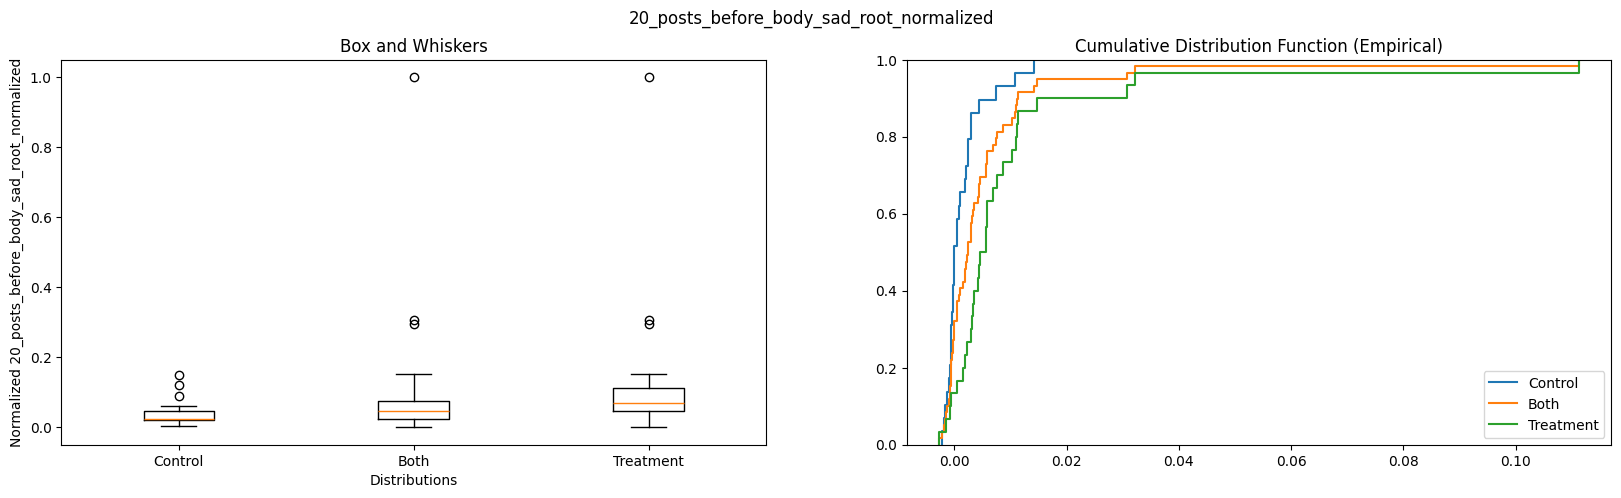











pvalue is 0.0002734043220426617


<Figure size 640x480 with 0 Axes>

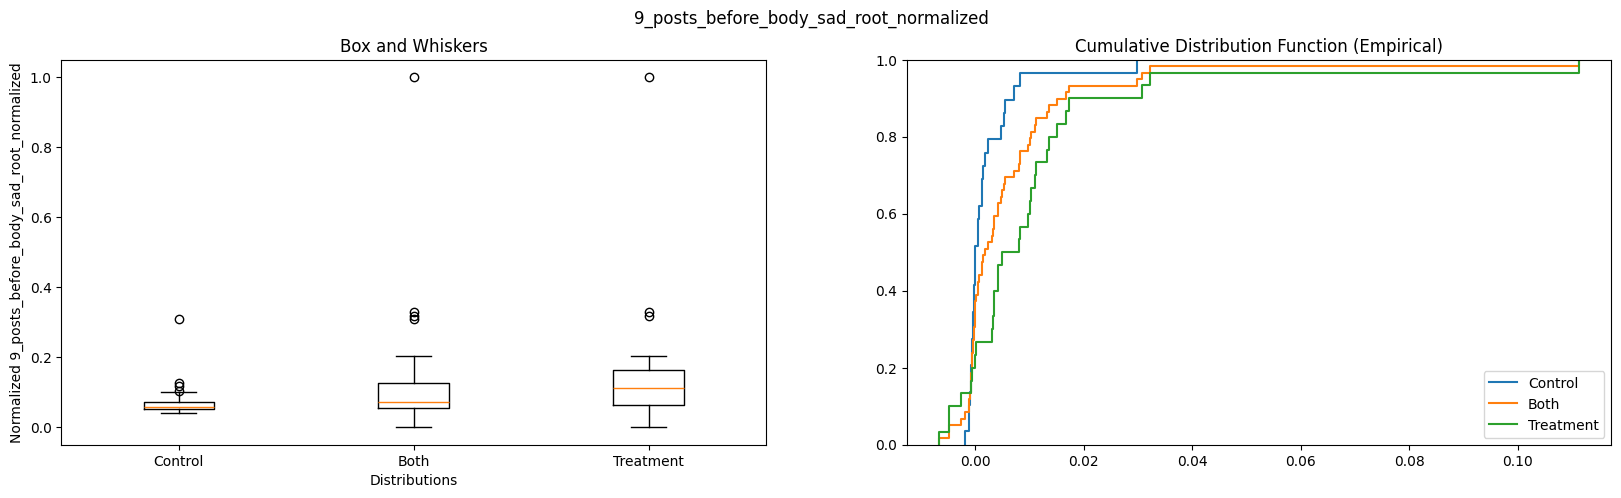











pvalue is 0.012013049125144785


<Figure size 640x480 with 0 Axes>

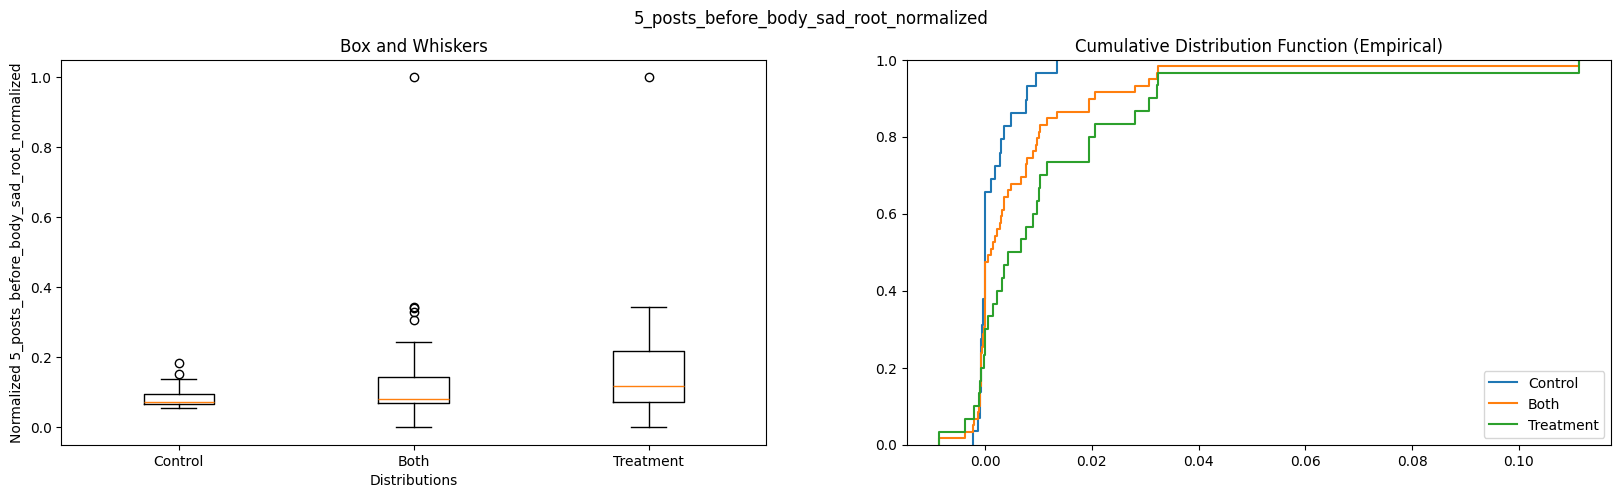











pvalue is 0.021900741349518808


<Figure size 640x480 with 0 Axes>

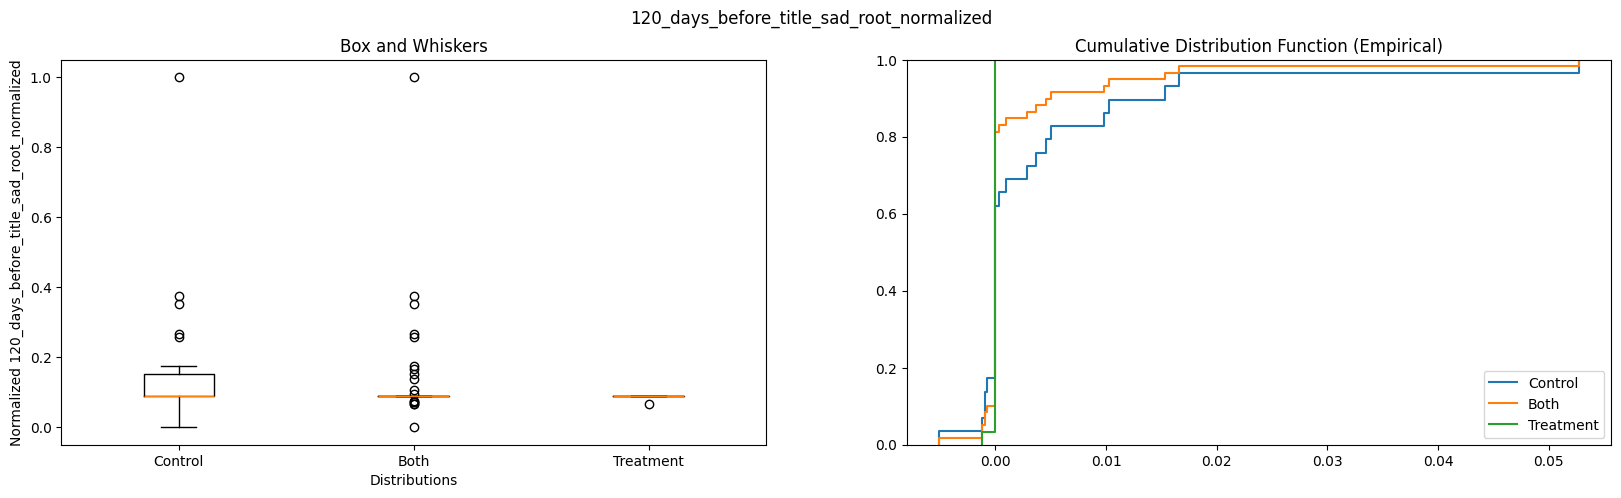











pvalue is 0.04757800497840935


<Figure size 640x480 with 0 Axes>

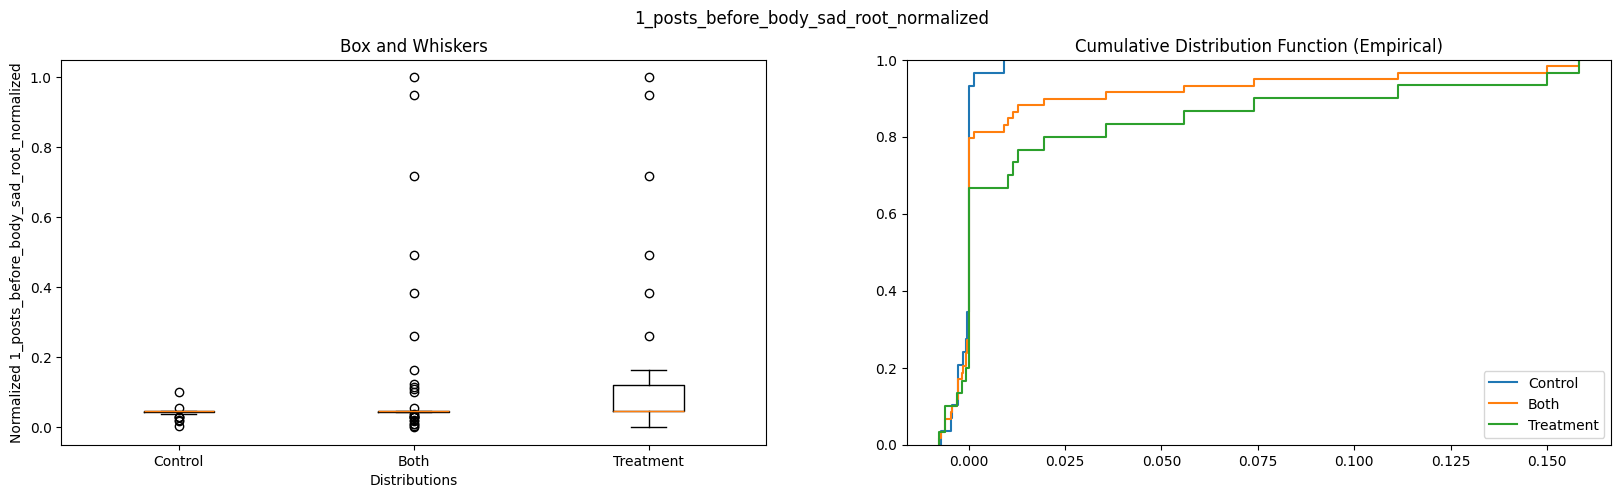

In [232]:
# miserables = """1_days_before_body_miserable_root_normalized
# 1_posts_before_body_miserable_root_normalized
# 21_days_before_body_miserable_root_normalized
# 365_days_before_body_miserable_root_normalized
# 3_days_before_body_miserable_root_normalized
# 3_posts_before_body_miserable_root_normalized
# 7_days_before_body_miserable_root_normalized
# 84_days_before_body_miserable_root_normalized""".split("\n")
for _, name in all_sig_diff:#miserables:
    if ("sad" in name):
        display_plot_by_name[name].show()